# Set up


In [1]:
import tweepy
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime, timedelta

In [2]:
CONSUMER_API_KEY = 'QOiNJGXEXREs0LVOcSlZhZG4w'
CONSUMER_API_SECRET = 'qHYTAtNHMTNaChnnsKixg04X3kTQd5Q7YjAoOO5E9q1c2YkSr4'
ACCESS_KEY = '2817119556-1ojynr2Q3Xgmhtnk0GesjRQU1tS4O6yxGwutuk1'
ACCESS_SECRET = 'F7aHAcjFpsKBQa4QdBFSCJRgCGdUxmXR5TiMcow6se3dA'

In [3]:
auth = tweepy.OAuthHandler(CONSUMER_API_KEY, CONSUMER_API_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
api = tweepy.API(auth, wait_on_rate_limit = True)

# #Organic

In [105]:
creat_list = []
user_list = []
followers_list = []
content_list = []
location_list = []
for tweet in tweepy.Cursor(api.search_tweets,q="#organic -filter:retweets", 
                           lang="en", tweet_mode='extended').items():
    
    created = str(tweet.created_at)
    creat_list.append(created)
    
    user = tweet.user.screen_name
    user_list.append(user)
    
    followers = str(tweet.user.followers_count)
    followers_list.append(followers)
    
    content = tweet.full_text
    content_list.append(content)
    
    location = tweet.user.location
    location_list.append(location)

itemdf = pd.DataFrame({"createdat":creat_list, "user":user_list, "followers":followers_list, 
                       "content":content_list, "location":location_list})

Rate limit reached. Sleeping for: 470


KeyboardInterrupt: 

In [ ]:
itemdf.to_csv("organic.csv")

In [ ]:
#Text book
tweets = []
for tweet in tweepy.Cursor(api.search_tweets,q="#organic -filter:retweets", 
                           lang="en", tweet_mode='extended').items():
    tweets.append(tweet)

In [ ]:
#Create day count
tweet_day = [tweet.created_at.date() for tweet in tweets]
tweet_day_df = pd.DataFrame(tweet_day,columns=['date'])
tweet_day_df = tweet_day_df.groupby('date')['date'].count().reset_index(name='count')
sns.lineplot(y=tweet_day_df['count'], x = tweet_day_df['date'])
plt.show()

In [ ]:
#Explore other hashtags
attached_tags = [tweet.entities['hashtags'] for tweet in tweets if tweet.entities['hashtags'] != []]
attached_tags_cleaned = [hashtag['text'].lower() for tags in attached_tags for hashtag in tags if hashtag['text'].lower() != 'organicwine']
hashtag_df = pd.DataFrame(attached_tags_cleaned,columns=['hashtag'])
hashtag_df = hashtag_df.groupby('hashtag')['hashtag'].count().reset_index(name='count')
hashtag_df.sort_values(by='count',ascending=False)

## Sentiment analysis #Organic

In [ ]:
compound_scores = []
for tweet in tweets:
    compound_scores.append(sia.polarity_scores(tweet.full_text)['compound'])
sns.histplot(compound_scores,bins=10)
plt.show()

In [ ]:
organicwine_score = pd.DataFrame (compound_scores, columns = ['organicwine_score'])
organicwine_score

In [ ]:
organicwine_score.describe()

Between $-1$ and $1$

$>0$ signifies a positive sentiment

$<0$ signifies a negative sentiment

# #Organic #wine (extended) (seperate)

In [93]:
creat_list = []
user_list = []
followers_list = []
content_list = []
location_list = []
for tweet in tweepy.Cursor(api.search_tweets,q="#organic AND wine -filter:retweets", 
                           lang="en", tweet_mode='extended').items():
    
    created = str(tweet.created_at)
    creat_list.append(created)
    
    user = tweet.user.screen_name
    user_list.append(user)
    
    followers = str(tweet.user.followers_count)
    followers_list.append(followers)
    
    content = tweet.full_text
    content_list.append(content)
    
    location = tweet.user.location
    location_list.append(location)

itemdfANDextended = pd.DataFrame({"createdat":creat_list, "user":user_list, "followers":followers_list, 
                       "content":content_list, "location":location_list})

In [ ]:
itemdfANDextended.to_csv("organic AND wine extended.csv")

In [97]:
#Text book
tweets = []
for tweet in tweepy.Cursor(api.search_tweets,q="#organic AND wine -filter:retweets", 
                           lang="en", tweet_mode='extended').items():
    tweets.append(tweet)

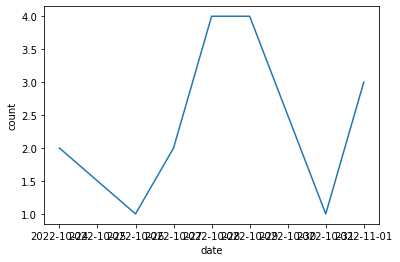

In [98]:
#Create day count
tweet_day = [tweet.created_at.date() for tweet in tweets]
tweet_day_df = pd.DataFrame(tweet_day,columns=['date'])
tweet_day_df = tweet_day_df.groupby('date')['date'].count().reset_index(name='count')
sns.lineplot(y=tweet_day_df['count'], x = tweet_day_df['date'])
plt.show()

In [99]:
#Explore other hashtags
attached_tags = [tweet.entities['hashtags'] for tweet in tweets if tweet.entities['hashtags'] != []]
attached_tags_cleaned = [hashtag['text'].lower() for tags in attached_tags for hashtag in tags if hashtag['text'].lower() != 'organicwine']
hashtag_df = pd.DataFrame(attached_tags_cleaned,columns=['hashtag'])
hashtag_df = hashtag_df.groupby('hashtag')['hashtag'].count().reset_index(name='count')
hashtag_df.sort_values(by='count',ascending=False)

,hashtag,count
52,organic,17
74,wine,8
61,vegan,4
5,biodynamic,3
70,vino,2
...,...,...
26,galvana,1
25,franklandriver,1
24,food,1
23,enjoy,1


## Sentiment analysis #Organic AND wine

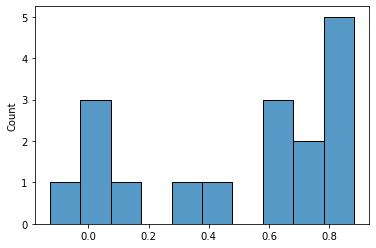

In [101]:
compound_scores = []
for tweet in tweets:
    compound_scores.append(sia.polarity_scores(tweet.full_text)['compound'])
sns.histplot(compound_scores,bins=10)
plt.show()

In [102]:
organicwine_score = pd.DataFrame (compound_scores, columns = ['organicwine_score'])
organicwine_score

,organicwine_score
0,0.6114
1,0.7896
2,0.0000
3,0.8475
4,0.3612
5,0.6981
6,0.3818
7,0.8316
8,0.0000
9,-0.1280


In [103]:
organicwine_score.describe()

,organicwine_score
count,17.000000
mean,0.483094
std,0.355816
min,-0.128000
25%,0.128000
50%,0.611400
75%,0.789600
max,0.882800


Between $-1$ and $1$

$>0$ signifies a positive sentiment

$<0$ signifies a negative sentiment

**The public's view to organic wine is positive**

# #organicwine (extended) (fulltext)

In [4]:
creat_list = []
user_list = []
followers_list = []
content_list = []
location_list = []
for tweet in tweepy.Cursor(api.search_tweets,q="#organicwine -filter:retweets", 
                           lang="en", tweet_mode='extended').items():
    
    created = str(tweet.created_at)
    creat_list.append(created)
    
    user = tweet.user.screen_name
    user_list.append(user)
    
    followers = str(tweet.user.followers_count)
    followers_list.append(followers)
    
    content = tweet.full_text
    content_list.append(content)
    
    location = tweet.user.location
    location_list.append(location)

itemdf_extended = pd.DataFrame({"createdat":creat_list, "user":user_list, "followers":followers_list, 
                       "content":content_list, "location":location_list})

In [ ]:
itemdf_extended.to_csv("organicwine_extended.csv")

In [69]:
#Text book
tweets = []
for tweet in tweepy.Cursor(api.search_tweets,q="#organicwine -filter:retweets", 
                           lang="en", tweet_mode='extended').items():
    tweets.append(tweet)

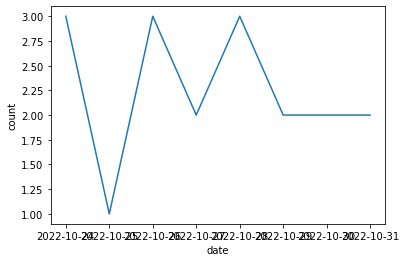

In [39]:
#Create day count
tweet_day = [tweet.created_at.date() for tweet in tweets]
tweet_day_df = pd.DataFrame(tweet_day,columns=['date'])
tweet_day_df = tweet_day_df.groupby('date')['date'].count().reset_index(name='count')
sns.lineplot(y=tweet_day_df['count'], x = tweet_day_df['date'])
plt.show()

In [65]:
#Explore other hashtags
attached_tags = [tweet.entities['hashtags'] for tweet in tweets if tweet.entities['hashtags'] != []]
attached_tags_cleaned = [hashtag['text'].lower() for tags in attached_tags for hashtag in tags if hashtag['text'].lower() != 'organicwine']
hashtag_df = pd.DataFrame(attached_tags_cleaned,columns=['hashtag'])
hashtag_df = hashtag_df.groupby('hashtag')['hashtag'].count().reset_index(name='count')
hashtag_df.sort_values(by='count',ascending=False)

,hashtag,count
68,wine,6
3,bio,4
63,vino,4
72,winelover,3
77,winetasting,3
...,...,...
39,parklandcounty,1
1,atxlife,1
42,redwine,1
43,regenerativefarming,1


## Finding out more about the people talking about #Organicwine

In [70]:
organicwine_tweets = []
for tweet in tweets:
    if 'organicwine' in tweet.full_text.lower():
        organicwine_tweets.append(tweet)

In [72]:
user_dict = {}
for tweet in organicwine_tweets:
    name = tweet.user.screen_name
    if name in user_dict:
        user_dict[name].append(tweet)
    else:
        user_dict[name] = [tweet]

In [73]:
active_tweeters = []
inactive_tweeters = []
for name in user_dict:
    if len(user_dict[name]) > 1:
        active_tweeters.append(user_dict[name][0].user)
    else:
        inactive_tweeters.append(user_dict[name][0].user)

In [74]:
print("There are " + str(len(active_tweeters)) + " users that wrote more than once about Organicwine")
print("There are " + str(len(inactive_tweeters)) + " users that wrote only once about Organicwine")

There are 3 users that wrote more than once about Organicwine
There are 10 users that wrote only once about Organicwine


## Text analysis #Organicwine

In [76]:
tweet = tweets[0]
tweet.full_text.split()

['Un',
 'Blend',
 'perfecto',
 'para',
 'deleitarse',
 'con',
 'amigos',
 '🍷',
 '-------',
 'A',
 'perfect',
 'Blend',
 'to',
 'enjoy',
 'with',
 'friends.',
 '🍷',
 'B',
 'L',
 'E',
 'N',
 'D',
 '✧',
 'O',
 'R',
 'G',
 'A',
 'N',
 'I',
 'C',
 '.',
 '🌿',
 '#organicwine',
 '#glutenfree',
 '#vegan',
 '🌿',
 '#ucovalley',
 '#wine',
 '#bio',
 '#nature',
 '#vinoargentino',
 '#winelover',
 '#malbec',
 '#cabernet',
 '#vino',
 '#vinotinto',
 '#redwine',
 '#blendwine',
 'https://t.co/0Wp3y6M7Uc']

In [78]:
text_list = [tweet.full_text for tweet in tweets]
word_list = [word.lower() for text in text_list for word in text.split() ]
word_list = [word.replace('#','') for word in word_list ]
word_list

['un',
 'blend',
 'perfecto',
 'para',
 'deleitarse',
 'con',
 'amigos',
 '🍷',
 '-------',
 'a',
 'perfect',
 'blend',
 'to',
 'enjoy',
 'with',
 'friends.',
 '🍷',
 'b',
 'l',
 'e',
 'n',
 'd',
 '✧',
 'o',
 'r',
 'g',
 'a',
 'n',
 'i',
 'c',
 '.',
 '🌿',
 'organicwine',
 'glutenfree',
 'vegan',
 '🌿',
 'ucovalley',
 'wine',
 'bio',
 'nature',
 'vinoargentino',
 'winelover',
 'malbec',
 'cabernet',
 'vino',
 'vinotinto',
 'redwine',
 'blendwine',
 'https://t.co/0wp3y6m7uc',
 'this',
 'spooky',
 'fellow',
 'was',
 'captured',
 'by',
 'our',
 'team',
 'member',
 'joe',
 'at',
 'albet',
 'i',
 'noya,',
 'an',
 'organic',
 'winery',
 'in',
 'penedès,',
 'spain',
 '🍇\u2060',
 '\u2060',
 'happy',
 "hallo'wine",
 'today',
 '👻🎃\u2060',
 'organicwine',
 'prayingmantis',
 'organicwinery',
 'https://t.co/irxs9id7sp',
 'with',
 'organic',
 'and',
 'biodynamic',
 'wine',
 'on',
 'the',
 'rise',
 'like',
 'never',
 'before,',
 'you',
 'may',
 'ask-',
 'what',
 'do',
 'these',
 'terms',
 'mean?',
 'jona

In [79]:
word_df = pd.DataFrame(word_list,columns=['word'])
word_df = word_df.groupby('word')['word'].count().reset_index(name='count')
word_df.sort_values(by='count',ascending=False).head(15)

,word,count
191,organicwine,16
283,wine,11
249,the,10
23,and,9
189,organic,7
186,of,7
15,a,7
144,in,6
298,with,5
254,to,5


## Sentiment analysis #Organicwine

In [5]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/irene/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/irene/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [25]:
nltk.corpus.stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [80]:
word_df = word_df[~(word_df['word'].isin(nltk.corpus.stopwords.words('english')))]
word_df.sort_values(by='count',ascending=False).head(15)

,word,count
191,organicwine,16
283,wine,11
189,organic,7
65,champagne,4
44,bio,4
268,vino,4
289,winelover,3
292,winery,3
294,winetasting,3
1,&amp;,3


In [83]:
tweet = tweets[0]
print(tweet.full_text)
sia.polarity_scores(tweet.full_text)['compound']

Un Blend perfecto para deleitarse con amigos 🍷

-------
A perfect Blend to enjoy with friends.

🍷 B L E N D ✧ O R G A N I C .

🌿 #organicwine #glutenfree #vegan
🌿 #ucovalley #wine #bio #nature

#vinoargentino #winelover #malbec #cabernet #vino
#vinotinto #redwine #blendwine https://t.co/0Wp3y6M7Uc


0.9062

In [84]:
sia = SentimentIntensityAnalyzer()

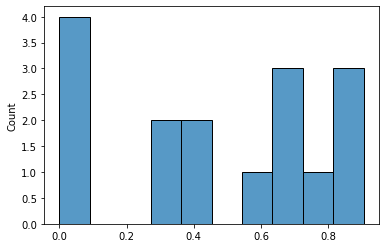

In [86]:
compound_scores = []
for tweet in tweets:
    compound_scores.append(sia.polarity_scores(tweet.full_text)['compound'])
sns.histplot(compound_scores,bins=10)
plt.show()

In [87]:
compound_scores

[0.9062,
 0.5719,
 0.3612,
 0.0,
 0.0,
 0.3182,
 0.7003,
 0.7814,
 0.0,
 0.4329,
 0.0,
 0.3818,
 0.6808,
 0.8264,
 0.7184,
 0.8402]

In [90]:
organicwine_score = pd.DataFrame (compound_scores, columns = ['organicwine_score'])
organicwine_score

,organicwine_score
0,0.9062
1,0.5719
2,0.3612
3,0.0000
4,0.0000
5,0.3182
6,0.7003
7,0.7814
8,0.0000
9,0.4329


In [92]:
organicwine_score.describe()

,organicwine_score
count,16.000000
mean,0.469981
std,0.331512
min,0.000000
25%,0.238650
50%,0.502400
75%,0.734150
max,0.906200


Between $-1$ and $1$

$>0$ signifies a positive sentiment

$<0$ signifies a negative sentiment

**The public's view to organic wine is positive**